<a href="https://colab.research.google.com/github/Tiepbn/Data-Aaalytics-with-python/blob/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Giới thiệu
Trong bối cảnh ngày càng tăng của sự kết nối xã hội trực tuyến, việc tổ chức sự kiện thông qua các nền tảng như Meetup,.. trở thành xu hướng phổ biến. Mỗi sự kiện thu hút một đối tượng người tham gia đa dạng, và việc dự đoán số lượng người tham gia có thể là một thách thức quan trọng đối với những người tổ chức.  
Do đó, chúng tôi xây dựng một mô hình dự đoán chính xác về nhóm người tham gia sự kiện trên Meetup dựa trên dữ liệu thu thập từ các sự kiện trước đó. Điều này sẽ giúp người tổ chức có cái nhìn chi tiết và dự đoán hơn về quy mô sự kiện, từ đó tối ưu hóa quản lý nguồn lực và tăng cường trải nghiệm tham gia của cộng đồng.
Để làm được điều đó chúng tôi phát triển một quy trình học máy liên quan đến việc sử dụng ba bộ phân loại (Decision Tree, Bernoulli Naive Bayes và RandomForest).

# Problem Statement


Các đặc tính liên quan đến tập dữ liệu là:

1. event_id: ID của sự kiện

2. attendees_user: số người tham dự

3. similar: độ tương quan mô tả của một sự kiện so với mô tả của cả nhóm

4. group_id: ID của nhóm

5. group_URLName: tên đường dẫn tới nhóm

6. event_name: tên sự kiện

7. event_url: đường dẫn đến sự kiện

8. datetime_new_york: thời gian theo giờ New York

9.  day: ngày tổ chức sự kiện

10. hour: giờ tổ chứuc sự kiện

11. weekday: thứ tổ chức sự kiện

12. weekday1: khoảng thời gian trong tuần: thứ 2 là đầu tuần, thứ 3,4,5 là giữa tuần, thứ 6,7,chủ nhật là cuối tuần tướng ứng với chỉ số 0,1,2

13. time: thời gian tổ chức sự kiện ở dạng epochtime

14. lat: toạ độ theo vĩ độ  

15. lon: toạ độ theo kinh độ  

16. hour_deviation: độ lệch của giờ

17. weekday_deviation: độ lệch của ngày trong tuần

18. description: mô tả của sự kiện

# Project Pipeline

Các bước thực hiện:

1. Import các thư viện cần thiết

2. Đọc và ghi tập dữ liệu

3. Thông tin và kiểu dữ liệu

4. Phân lớp cho tập dữ liệu

5. Trực quan hoá

6. Tách dữ liệu thành tập test và train

7. Xây dựng mô hình

Kết luận

#1.Import các thư viện cần thiết


In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


from wordcloud import WordCloud
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#2.Đọc và ghi tập dữ liệu

In [ ]:
df = pd.read_csv('/content/process2_text.csv')

#3.Thông tin và kiểu dữ liệu

In [ ]:
df.head()

event_id  attendees_user     id  similar  group_id  \
0  221955590              38   8047  1.00000    255307   
1  260198013               6  20424  0.80073  19220431   
2  261398498              14  20435  0.66421  19220431   
3  262295276              25  26090  1.00000   1248869   
4  263040642              23  26195  1.00000  19737006   

                         group_URLName  \
0                        nycaffiliates   
1                      RadFemActivists   
2                      RadFemActivists   
3                   croppersdelightnyc   
4  20-30-Something-LongReads-Book-Club   

                                          event_name  \
0                     Affiliate Marketing Power Hour   
1  CHALK 2020: remembering victims of the Triangl...   
2              Denim Day NYC 2020 Annual Rally, 4/29   
3   SCRAPVIVOR/NO FRILLS SCRAPBOOKING CROP MAHWAH NJ   
4  "Behave: The Biology of Humans at Our Best and...   

                                           event_url  \
0  https://www.meetup.com/nycaffiliates/events/22...   
1  https://www.meetup.com/RadFemActivists/events/...   
2  https://www.meetup.com/RadFemActivists/events/...   
3  https://www.meetup.com/croppersdelightnyc/even...   
4  https://www.meetup.com/20-30-Something-LongRea...   

           datetime_new_york  day  hour  weekday  weekday1       time  \
0  2020-04-27 19:00:00-04:00   27  19.0      0.0         0  158802840   
1  2020-03-25 11:30:00-04:00   25  11.0      2.0         1  158515020   
2  2020-04-29 12:00:00-04:00   29  12.0      2.0         1  158817600   
3  2020-03-13 10:00:00-04:00   13  10.0      4.0         2  158410800   
4  2020-04-19 12:00:00-04:00   19  12.0      6.0         2  158731200   

         lat         lon  hour_deviation  weekday_deviation  \
0  -8.521147  179.196200        2.757277          -3.008511   
1  40.721070  -73.983826       -5.242724          -1.008511   
2  40.714350  -74.002990       -4.242724          -1.008511   
3  41.087097  -74.156760       -6.242724           0.991489   
4  40.753937  -73.992070       -4.242724           2.991489   

                                         description  
0  get meet ask yo rock contain greet question mu...  
1  follow event hope steal place ladder took vita...  
2  unit forget meant page touch overturn rape sym...  
3  relax event room miss cancel quad also make ga...  
4  jane field research whether report genet back ...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   event_id           5875 non-null   object 
 1   attendees_user     5875 non-null   int64  
 2   id                 5875 non-null   int64  
 3   similar            5875 non-null   float64
 4   group_id           5875 non-null   int64  
 5   group_URLName      5875 non-null   object 
 6   event_name         5875 non-null   object 
 7   event_url          5875 non-null   object 
 8   datetime_new_york  5875 non-null   object 
 9   day                5875 non-null   int64  
 10  hour               5875 non-null   float64
 11  weekday            5875 non-null   float64
 12  weekday1           5875 non-null   int64  
 13  time               5875 non-null   int64  
 14  lat                5875 non-null   float64
 15  lon                5875 non-null   float64
 16  hour_deviation     5875 

In [ ]:
print("Độ lớn của dataset: ",len(df),'dòng')

Độ lớn của dataset:  5875 dòng


In [ ]:
df.columns

Index(['event_id', 'attendees_user', 'id', 'similar', 'group_id',
       'group_URLName', 'event_name', 'event_url', 'datetime_new_york', 'day',
       'hour', 'weekday', 'weekday1', 'time', 'lat', 'lon', 'hour_deviation',
       'weekday_deviation', 'description'],
      dtype='object')

In [ ]:
df.shape

(5875, 19)

In [ ]:
df.dtypes

event_id              object
attendees_user         int64
id                     int64
similar              float64
group_id               int64
group_URLName         object
event_name            object
event_url             object
datetime_new_york     object
day                    int64
hour                 float64
weekday              float64
weekday1               int64
time                   int64
lat                  float64
lon                  float64
hour_deviation       float64
weekday_deviation    float64
description           object
dtype: object

In [ ]:
np.sum(df.isnull().any(axis=1))  #Đếm tổng số cột có giá trị null


18

In [ ]:
print('Số cột: ', len(df.columns))
print('Số dòng:', len(df))

Số cột:  19
Số dòng: 5875


In [ ]:
df.describe()

attendees_user            id      similar      group_id          day  \
count     5875.000000   5875.000000  5875.000000  5.875000e+03  5875.000000   
mean        10.476255  32028.537362     0.962709  1.098442e+07    14.455319   
std         18.297830  20952.197747     0.114631  9.094574e+06     8.827838   
min          3.000000     96.000000     0.000000  8.940000e+03     1.000000   
25%          3.000000  15367.000000     1.000000  1.604330e+06     7.000000   
50%          5.000000  27767.000000     1.000000  9.513972e+06    14.000000   
75%         10.000000  46663.500000     1.000000  1.954062e+07    22.000000   
max        581.000000  84986.000000     1.000000  2.675186e+07    31.000000   

              hour      weekday     weekday1          time          lat  \
count  5875.000000  5875.000000  5875.000000  5.875000e+03  5875.000000   
mean     16.242723     3.008511     1.291574  1.585562e+08    23.914357   
std       3.839029     1.953650     0.663450  1.643593e+05    23.260903   
min       0.000000     0.000000     0.000000  1.583023e+08    -8.521147   
25%      13.000000     1.000000     1.000000  1.583894e+08    -8.521147   
50%      18.000000     3.000000     1.000000  1.585696e+08    40.712784   
75%      19.000000     5.000000     2.000000  1.587055e+08    40.752464   
max      23.000000     6.000000     2.000000  1.588203e+08    51.131470   

               lon  hour_deviation  weekday_deviation  
count  5875.000000    5.875000e+03       5.875000e+03  
mean     10.619526   -6.988255e-08       3.974979e-08  
std     119.370114    3.839029e+00       1.953650e+00  
min    -122.422320   -1.624272e+01      -3.008511e+00  
25%     -73.995674   -3.242723e+00      -2.008511e+00  
50%     -73.970660    1.757276e+00      -8.510590e-03  
75%     179.196200    2.757277e+00       1.991489e+00  
max     179.196200    6.757276e+00       2.991489e+00

# 4.Phân lớp cho tập dữ liệu

Ở đây Chúng tôi sẽ phân loại ra thành 3 nhóm sự kiện với ý nghĩa sự kiện nhỏ, sự kiện vừa và sự kiện lớn.
  

1.  Nhãn 0 là những sự kiện nhỏ dưới 7 người.
2.  Nhãn 1 là những sự kiện vừa từ 7 đến dưới 25 người.
3.  Nhãn 2 là những sự kiện lớn từ 25 người trở lên.


  
  

In [ ]:
def classify_value(value):
    if 3 <= value < 7:
        return 0
    elif 7 <= value < 25:
        return 1
    else :
        return 2

# Áp dụng hàm ánh xạ để tạo cột mới
df['attendees_user_class'] = df['attendees_user'].apply(lambda x: classify_value(x))

In [ ]:
df['attendees_user_class']

0       2
1       0
2       1
3       2
4       1
       ..
5870    0
5871    2
5872    2
5873    0
5874    0
Name: attendees_user_class, Length: 5875, dtype: int64

# 5.Trực quan hoá

##5.1. trực quan hoá bằng log scale để thể hiện số người tham gia vào các sự kiện




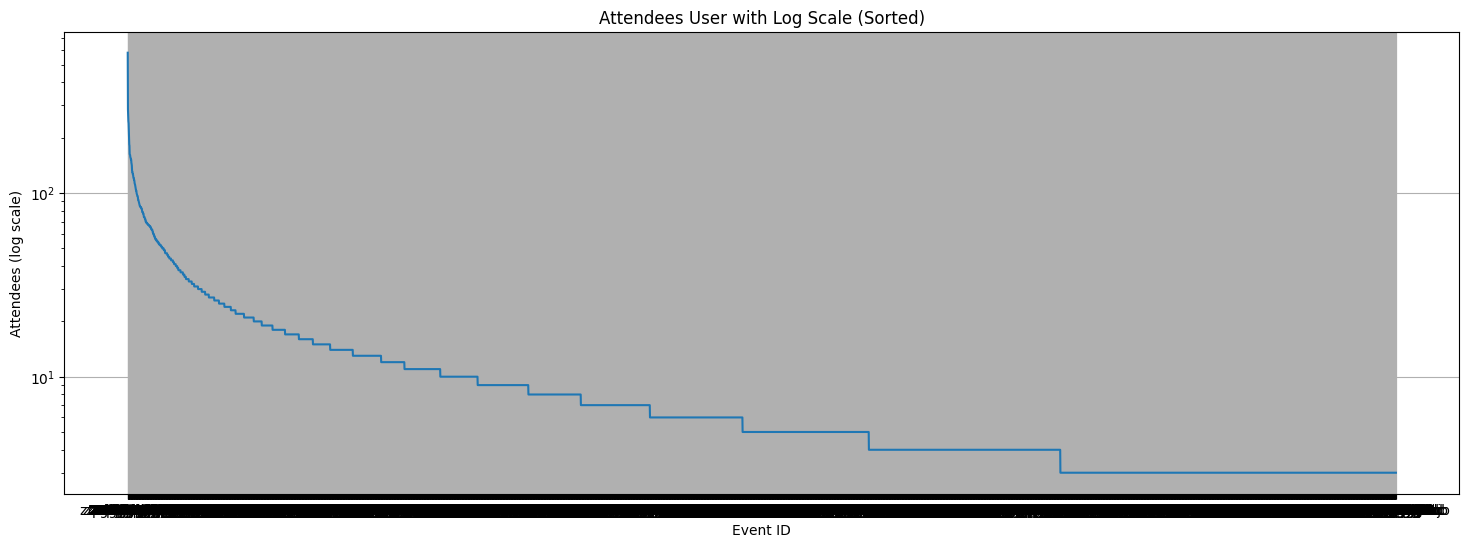

In [ ]:
# Sắp xếp DataFrame theo cột 'attendees_user' từ lớn đến nhỏ
df_sorted = df.sort_values(by='attendees_user', ascending=False)

# Trực quan hóa cột 'attendees_user' bằng log scale
plt.figure(figsize=(18, 6))
plt.plot(df_sorted['event_id'], df_sorted['attendees_user'])
plt.yscale('log')  # Đặt y-axis scale là log scale
plt.xlabel('Event ID')
plt.ylabel('Attendees (log scale)')
plt.title('Attendees User with Log Scale (Sorted)')

plt.gca().set_facecolor('none')

plt.grid(True)
plt.show()

Nhận xét: Qua việc trực quan hoá bằng log scale ta thấy rằng trong tập dữ liệu các sự kiện được tham gia bởi 10 người trở xuống chiếm phần lớn


##5.2. Bar chart : So sánh các lớp với sự kiện

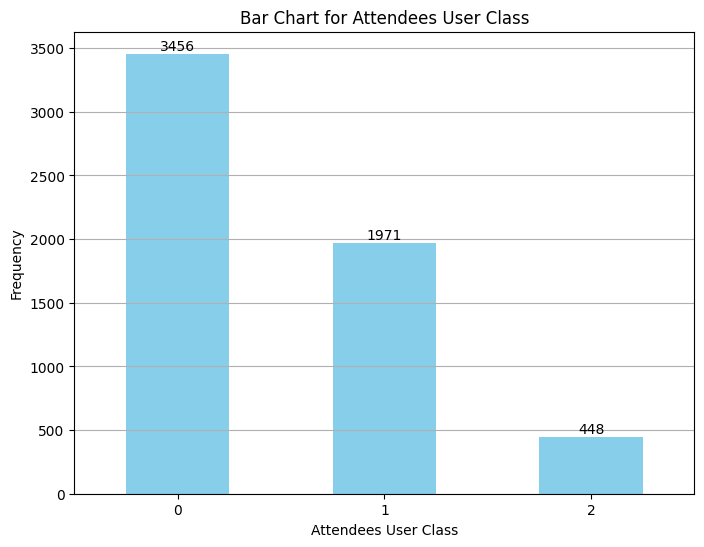

In [ ]:
# Tính tổng số lần xuất hiện của mỗi giá trị
value_counts = df['attendees_user_class'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Attendees User Class')
plt.ylabel('Frequency')
plt.title('Bar Chart for Attendees User Class')
plt.xticks(rotation=0)  # Đặt các nhãn trục x không xoay
plt.grid(axis='y')  # Hiển thị lưới trên trục y

# Hiển thị số lượng trên mỗi cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

##5.3. Pie chart: So sánh các lớp với nhau

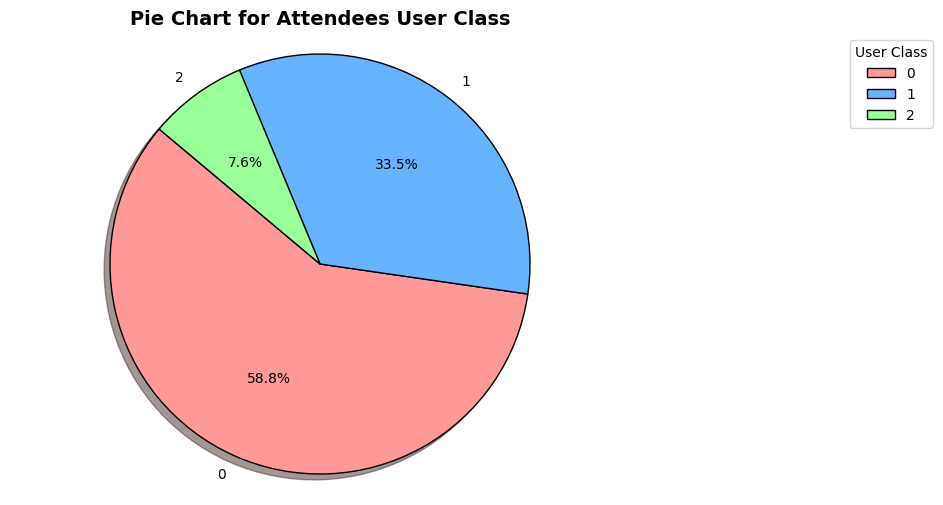

In [ ]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Vẽ biểu đồ tròn với hiệu ứng 3D
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'}, shadow=True)
plt.title('Pie Chart for Attendees User Class', fontsize=14, fontweight='bold')

# Thêm chú thích và điều chỉnh tỉ lệ khung hình
plt.axis('equal')  # Đảm bảo biểu đồ tròn có tỉ lệ khung hình chuẩn
plt.legend(title='User Class', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)  # Chú thích ở góc trên bên phải
plt.show()

Nhận xét: Dựa vào biểu đồ trực quan hoá ta thấy, số người dưới 7 tham gia vào các sự kiện chiếm tỉ lệ lớn hơn so với số người có từ 7 đến dưới 25 người tham gia và số người từ 25 người tham gia trở lên.Số người tham gia dưới 7 người vào các sự kiện chiếm chiếm tỉ lệ là 58,8%. Trong khi đó số lượng người tham gia từ 7 đến dưới 25 người là 33,5% và số lượng người tham gia trên 25 người là 7,6% chiếm tỉ lệ rất nhỏ. Điều này cho thấy rằng trong tập dữ liệu, các sự kiện được tổ chức chủ yếu có rất ít người tham gia.

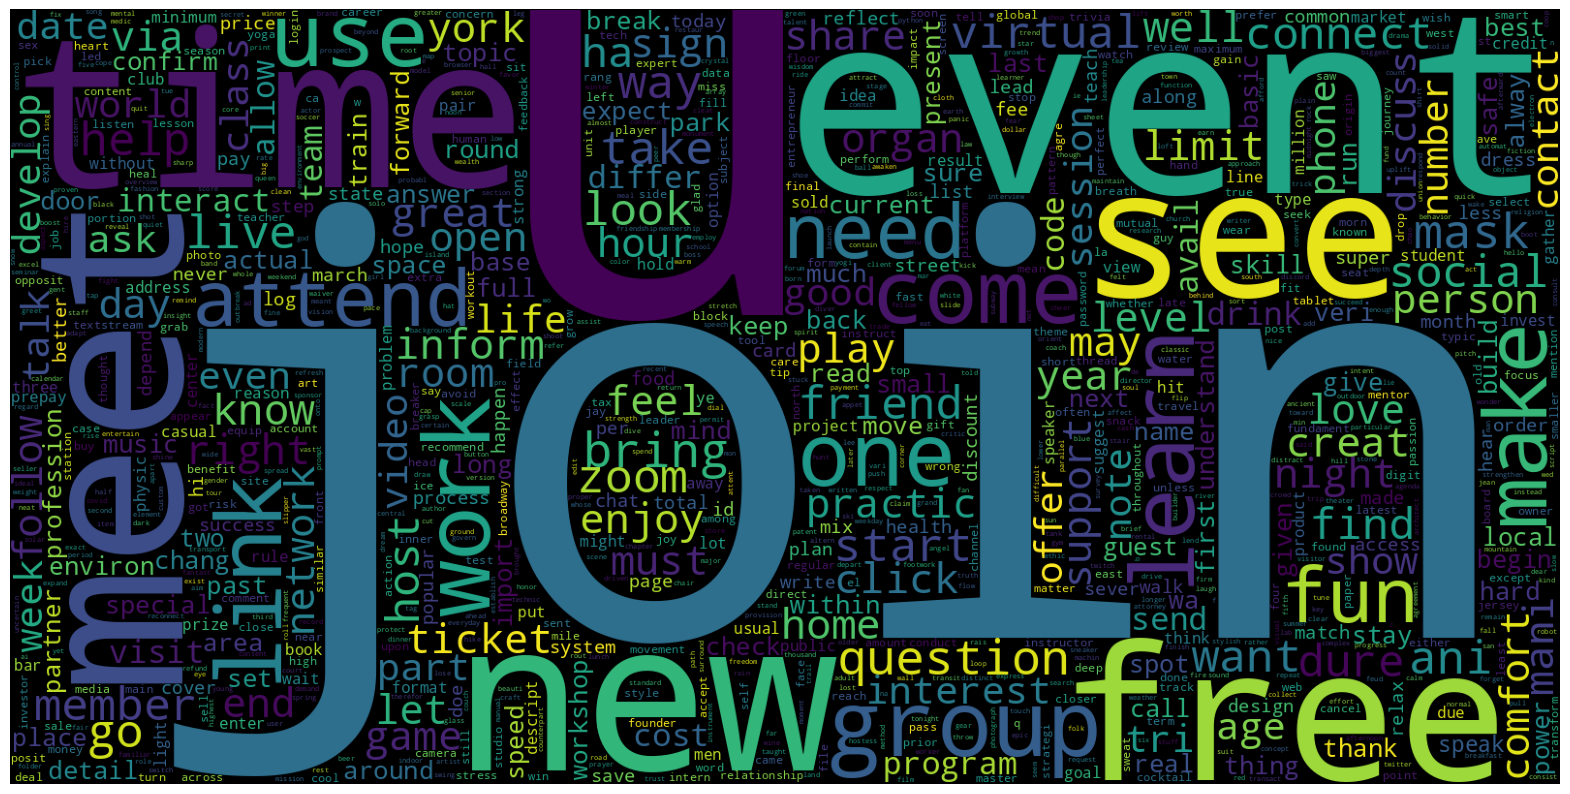

In [ ]:
# Chuyển đổi tất cả các giá trị trong cột "description" sang chuỗi
data_pos = df[df['attendees_user_class'] == 0]["description"].astype(str)

# Tạo WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.axis('off')
plt.show()


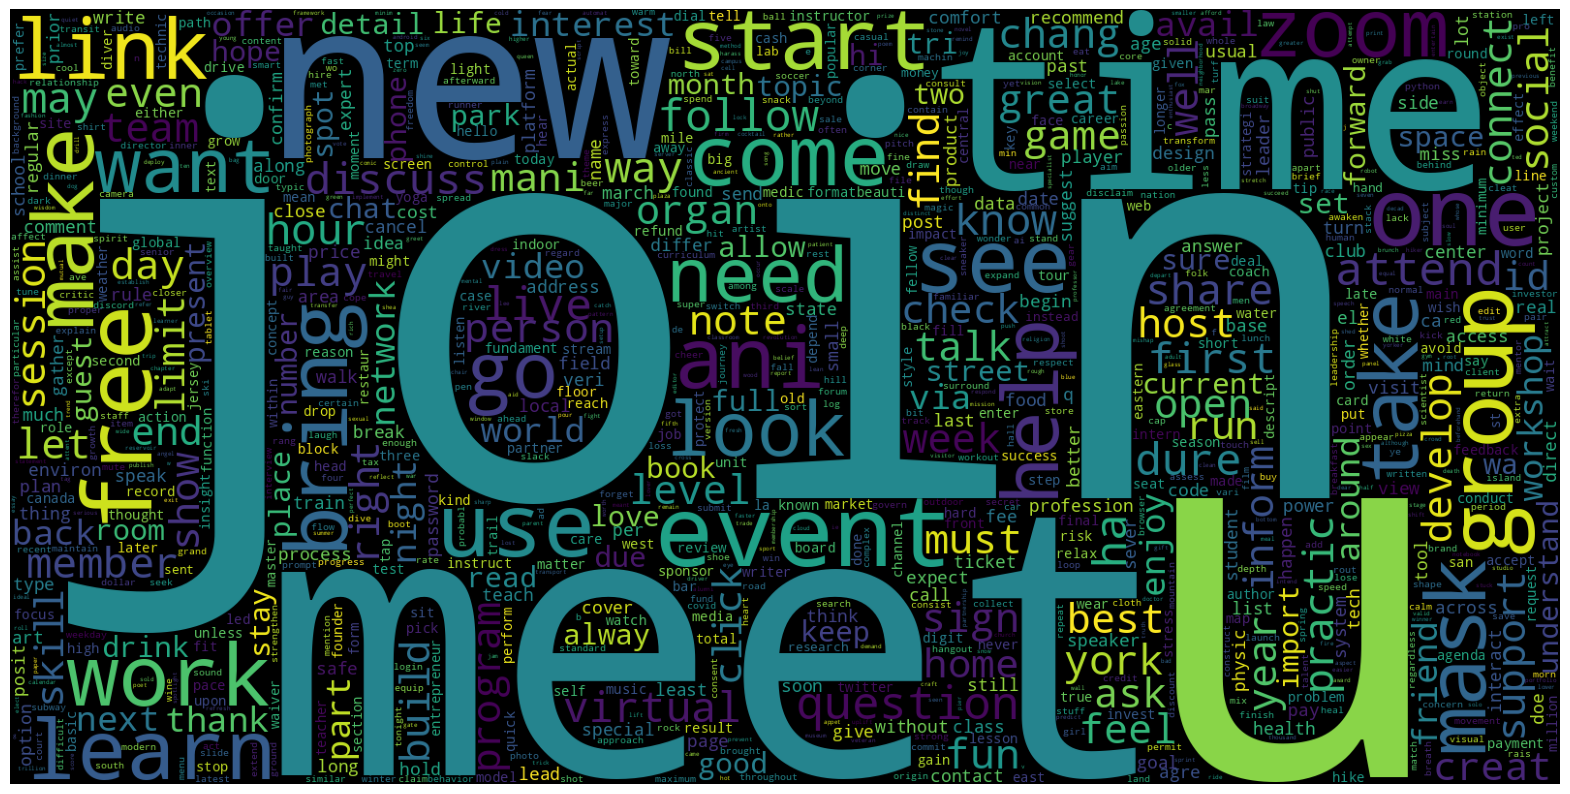

In [ ]:
# Chuyển đổi tất cả các giá trị trong cột "description" sang chuỗi
data_pos = df[df['attendees_user_class'] == 1]["description"].astype(str)

# Tạo WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.axis('off')
plt.show()

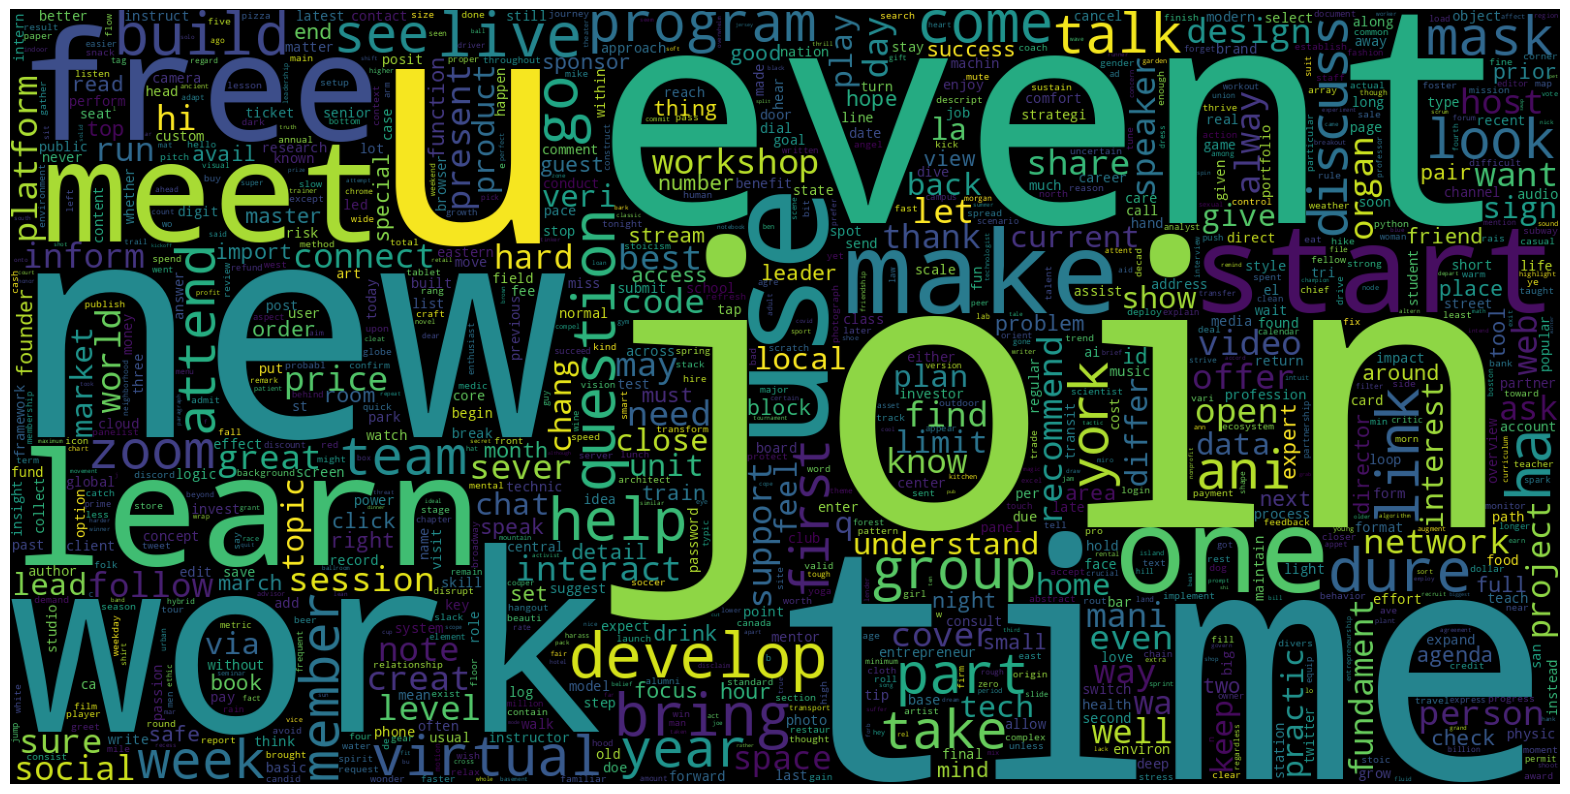

In [ ]:
# Chuyển đổi tất cả các giá trị trong cột "description" sang chuỗi
data_pos = df[df['attendees_user_class'] == 2]["description"].astype(str)

# Tạo WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.axis('off')
plt.show()

Biểu đồ violinplot được sử dụng để trực quan hóa phân phối của dữ liệu theo từng nhóm hoặc phân loại. Trong trường hợp này, biểu đồ violinplot được sử dụng để so sánh phân phối của cột 'day' (ngày) dựa trên các giá trị của 'attendees_user_class' (lớp người tham dự).



<ipython-input-20-e84f800b3329>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='attendees_user_class', y='day', data=df, palette=color_palette)
<ipython-input-20-e84f800b3329>:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(x='attendees_user_class', y='day', data=df, palette=color_palette)


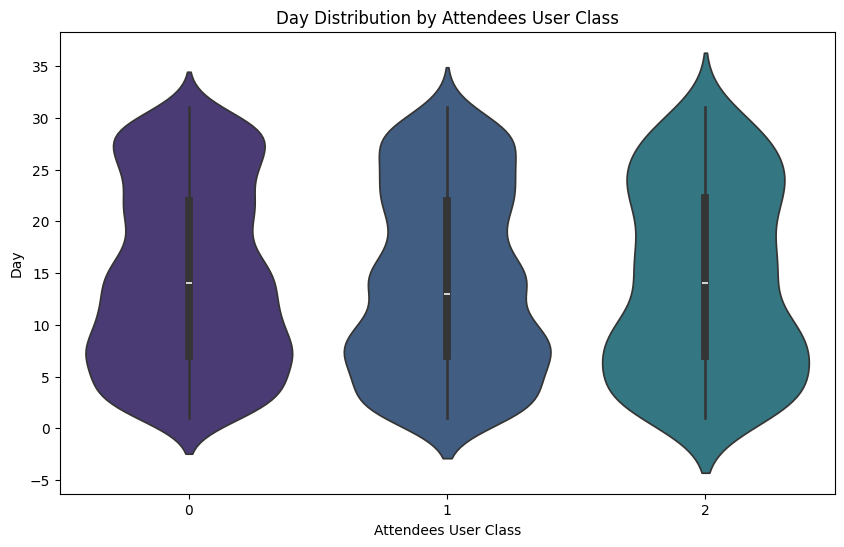

In [ ]:
color_palette = sns.color_palette("viridis")

# Trực quan hóa cột 'day' theo cột 'attendees_user_class' bằng violinplot với palette màu sắc đã chọn
plt.figure(figsize=(10, 6))
sns.violinplot(x='attendees_user_class', y='day', data=df, palette=color_palette)
plt.title('Day Distribution by Attendees User Class')
plt.xlabel('Attendees User Class')
plt.ylabel('Day')
plt.show()

Ở trục x, chúng ta có các nhóm được phân loại dựa trên 'attendees_user_class' (có 3 giá trị: 0, 1, 2). Ở trục y, chúng ta có các giá trị của cột 'day' (ngày).

Mỗi violinplot biểu diễn một phân phối của dữ liệu. Phân phối được biểu diễn dưới dạng một hình dạng dạng violin, trong đó chiều rộng của violin thể hiện mật độ của dữ liệu tại các giá trị khác nhau của trục y. Mật độ cao hơn được hiển thị bằng các vùng màu đậm hơn, trong khi mật độ thấp hơn được hiển thị bằng các vùng màu nhạt hơn.

Bằng cách so sánh các violinplot tương ứng với các nhóm 'attendees_user_class', chúng ta có thể nhận biết sự phân phối của cột 'day' trong mỗi nhóm, giúp hiểu rõ hơn về mối quan hệ giữa lớp người tham dự và ngày diễn ra sự kiện.

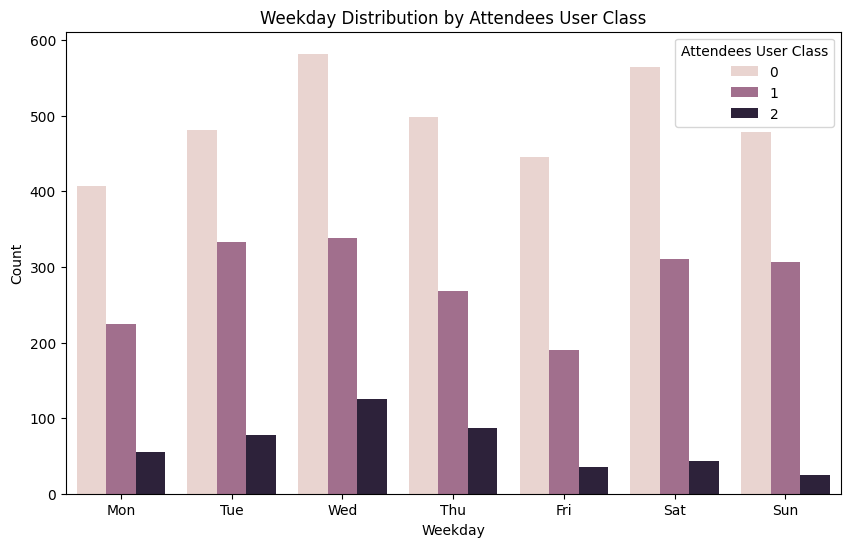

In [ ]:
# Trực quan hóa cột 'weekday' theo cột 'attendees_user_class' bằng countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', hue='attendees_user_class', data=df)
plt.title('Weekday Distribution by Attendees User Class')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Đặt nhãn cho trục x
plt.legend(title='Attendees User Class')
plt.show()

Biểu đồ trên là biểu đồ countplot, được sử dụng để thể hiện số lượng quan sát trong mỗi nhóm hoặc phân loại. Trong trường hợp này, biểu đồ countplot được sử dụng để thể hiện phân phối của các ngày trong tuần (weekday) dựa trên các nhóm người tham dự sự kiện (attendees_user_class).

Trục x của biểu đồ là các ngày trong tuần (Monday đến Sunday), từ 0 đến 6.
Trục y thể hiện số lượng các sự kiện diễn ra trong mỗi ngày.
Mỗi cột trên biểu đồ đại diện cho một ngày trong tuần, và chiều cao của cột tương ứng với số lượng sự kiện diễn ra vào ngày đó.
Các cột được phân tách theo các nhóm người tham dự sự kiện (attendees_user_class). Mỗi nhóm được hiển thị bằng một màu sắc khác nhau trên cùng một ngày.
Bằng cách này, biểu đồ countplot giúp so sánh sự phân phối của các ngày trong tuần dựa trên các nhóm người tham dự sự kiện khác nhau.

nhìn vào biểu đồ ta có thể thấy rằng thứ 4 và thứ 7 là hai ngày có số lượng sự kiện xảy ra nhiều nhất cho cả 3 loại sự kiện.

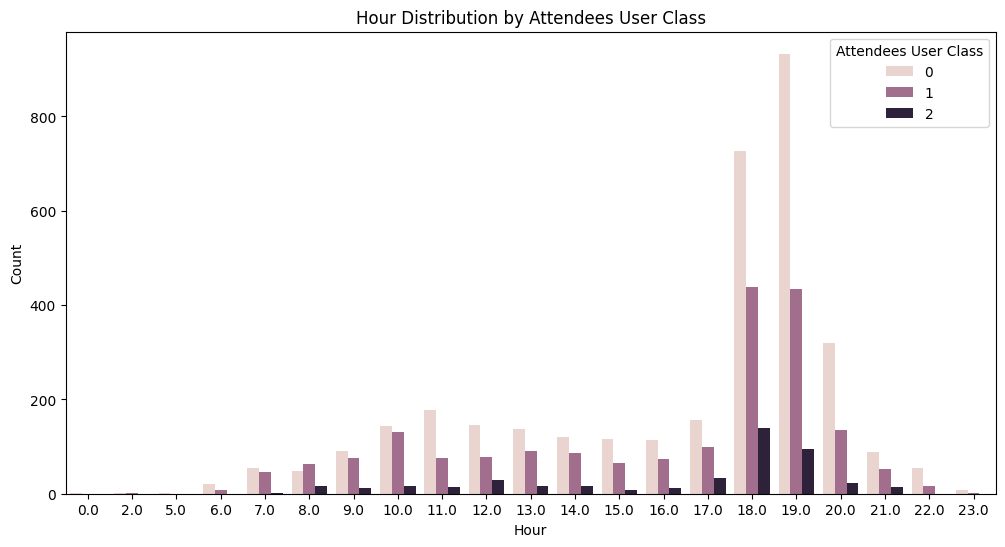

In [ ]:
# Trực quan hóa cột 'hour' theo cột 'attendees_user_class' bằng countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='attendees_user_class', data=df)
plt.title('Hour Distribution by Attendees User Class')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Attendees User Class')
plt.show()

In [ ]:
df.dtypes

event_id                 object
attendees_user            int64
id                        int64
similar                 float64
group_id                  int64
group_URLName            object
event_name               object
event_url                object
datetime_new_york        object
day                       int64
hour                    float64
weekday                 float64
weekday1                  int64
time                      int64
lat                     float64
lon                     float64
hour_deviation          float64
weekday_deviation       float64
description              object
attendees_user_class      int64
dtype: object

In [ ]:
df.head()

event_id  attendees_user     id  similar  group_id  \
0  221955590              38   8047  1.00000    255307   
1  260198013               6  20424  0.80073  19220431   
2  261398498              14  20435  0.66421  19220431   
3  262295276              25  26090  1.00000   1248869   
4  263040642              23  26195  1.00000  19737006   

                         group_URLName  \
0                        nycaffiliates   
1                      RadFemActivists   
2                      RadFemActivists   
3                   croppersdelightnyc   
4  20-30-Something-LongReads-Book-Club   

                                          event_name  \
0                     Affiliate Marketing Power Hour   
1  CHALK 2020: remembering victims of the Triangl...   
2              Denim Day NYC 2020 Annual Rally, 4/29   
3   SCRAPVIVOR/NO FRILLS SCRAPBOOKING CROP MAHWAH NJ   
4  "Behave: The Biology of Humans at Our Best and...   

                                           event_url  \
0  https://www.meetup.com/nycaffiliates/events/22...   
1  https://www.meetup.com/RadFemActivists/events/...   
2  https://www.meetup.com/RadFemActivists/events/...   
3  https://www.meetup.com/croppersdelightnyc/even...   
4  https://www.meetup.com/20-30-Something-LongRea...   

           datetime_new_york  day  hour  weekday  weekday1       time  \
0  2020-04-27 19:00:00-04:00   27  19.0      0.0         0  158802840   
1  2020-03-25 11:30:00-04:00   25  11.0      2.0         1  158515020   
2  2020-04-29 12:00:00-04:00   29  12.0      2.0         1  158817600   
3  2020-03-13 10:00:00-04:00   13  10.0      4.0         2  158410800   
4  2020-04-19 12:00:00-04:00   19  12.0      6.0         2  158731200   

         lat         lon  hour_deviation  weekday_deviation  \
0  -8.521147  179.196200        2.757277          -3.008511   
1  40.721070  -73.983826       -5.242724          -1.008511   
2  40.714350  -74.002990       -4.242724          -1.008511   
3  41.087097  -74.156760       -6.242724           0.991489   
4  40.753937  -73.992070       -4.242724           2.991489   

                                         description  attendees_user_class  
0  get meet ask yo rock contain greet question mu...                     2  
1  follow event hope steal place ladder took vita...                     0  
2  unit forget meant page touch overturn rape sym...                     1  
3  relax event room miss cancel quad also make ga...                     2  
4  jane field research whether report genet back ...                     1

In [ ]:

df_sorted = df.sort_values(by='time')


In [ ]:
df_sorted.columns

Index(['event_id', 'attendees_user', 'id', 'similar', 'group_id',
       'group_URLName', 'event_name', 'event_url', 'datetime_new_york', 'day',
       'hour', 'weekday', 'weekday1', 'time', 'lat', 'lon', 'hour_deviation',
       'weekday_deviation', 'description', 'attendees_user_class'],
      dtype='object')

#6.Tách dữ liệu

In [ ]:
# Chuyển các cột sang dạng dữ liệu categorical
df_sorted['day'] = df_sorted['day'].astype('category')
df_sorted['hour'] = df_sorted['hour'].astype('category')
df_sorted['weekday'] = df_sorted['weekday'].astype('category')


In [ ]:
# Tính số lượng dòng cho tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(df_sorted))

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
df_train = df_sorted.iloc[:train_size]
df_test = df_sorted.iloc[train_size:]

# Hiển thị kích thước của tập huấn luyện và tập kiểm tra
print("Training set size:", len(df_train))
print("Test set size:", len(df_test))

# Tách dữ liệu thành các tập x_train, y_train, x_test và y_test
X_train = df_train[[ 'similar', 'day', 'hour', 'weekday','day', 'hour_deviation','weekday_deviation']]
y_train = df_train['attendees_user_class']
X_test = df_test[[ 'similar', 'day', 'hour', 'weekday','day', 'hour_deviation','weekday_deviation']]
y_test = df_test['attendees_user_class']




Training set size: 4700
Test set size: 1175


#7.Xây dựng mô hình

##Decision Tree

In [ ]:
# Khởi tạo danh sách để lưu kết quả
dt = []

# Khởi tạo ma trận confusion matrix trung bình
average_cm = np.zeros((3, 3))


for i in range(10):
    # Khởi tạo và huấn luyện mô hình Decision Tree
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá độ chính xác của mô hình và lưu kết quả vào danh sách
    accuracy = accuracy_score(y_test, y_pred)
    dt.append(accuracy)

    # Tính confusion matrix cho lần chạy hiện tại
    cm = confusion_matrix(y_test, y_pred)
    average_cm += cm
print(sum(dt)/10)

0.5126808510638298


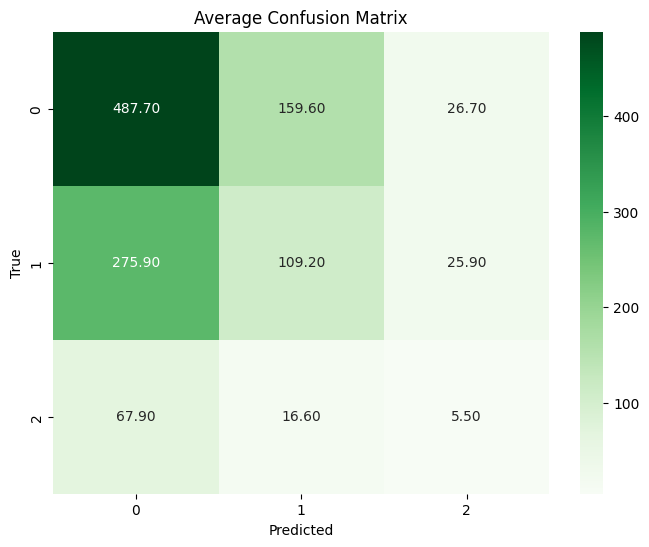

In [ ]:
average_cm /= 10
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

##Random forest

In [ ]:

# Khởi tạo danh sách để lưu kết quả
rf = []

# Khởi tạo ma trận confusion matrix trung bình
average_cm = np.zeros((3, 3))


for i in range(10):
    # Khởi tạo mô hình Random Forest
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá độ chính xác của mô hình và lưu kết quả vào danh sách
    accuracy = accuracy_score(y_test, y_pred)
    rf.append(accuracy)

    # Tính confusion matrix cho lần chạy hiện tại
    cm = confusion_matrix(y_test, y_pred)
    average_cm += cm
print(sum(rf)/10)




0.552936170212766


In [ ]:

# Lấy Gini importance từ mô hình
importances = model.feature_importances_

# In ra độ quan trọng của các đặc trưng
print("Feature Importances:", importances)


Feature Importances: [0.28801324 0.14106881 0.16202461 0.05575514 0.13545858 0.15940397
 0.05827564]


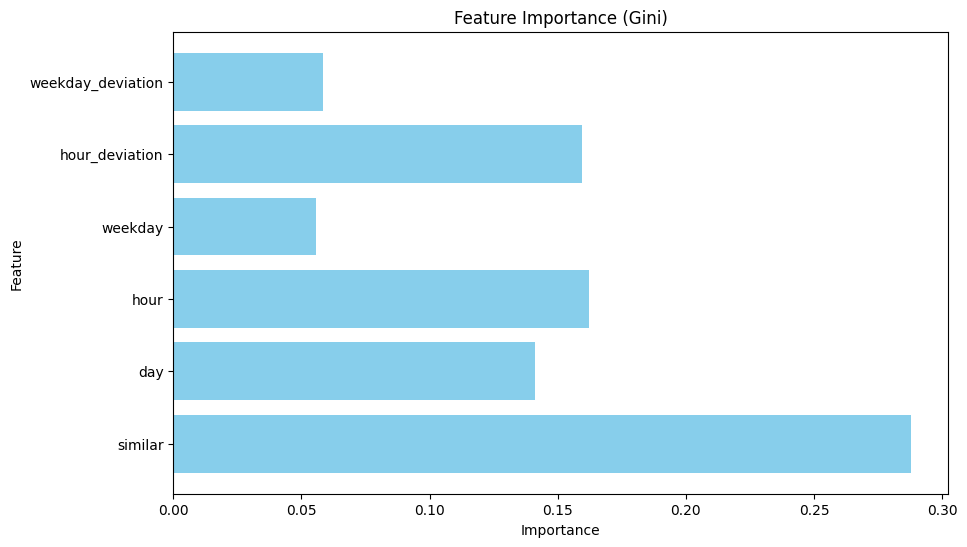

In [ ]:
# Đặt tên cho các đặc trưng
feature_names = X_train.columns

# Vẽ biểu đồ cột cho độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Gini)')
plt.show()

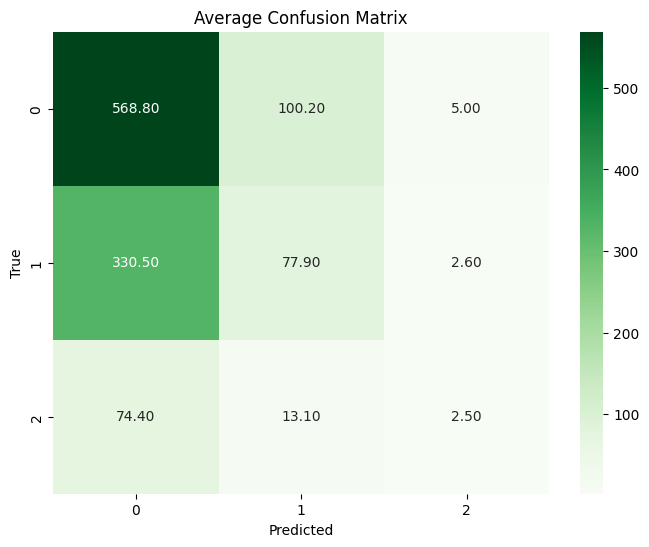

In [ ]:
average_cm /= 10
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

##svm

In [ ]:


# Khởi tạo danh sách để lưu kết quả
svm = []

# Khởi tạo ma trận confusion matrix trung bình
average_cm = np.zeros((3, 3))


for i in range(10):

    # Khởi tạo mô hình SVM
    model = SVC()
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá độ chính xác của mô hình và lưu kết quả vào danh sách
    accuracy = accuracy_score(y_test, y_pred)
    svm.append(accuracy)

    # Tính confusion matrix cho lần chạy hiện tại
    cm = confusion_matrix(y_test, y_pred)
    average_cm += cm
print(sum(svm)/10)





0.5736170212765959


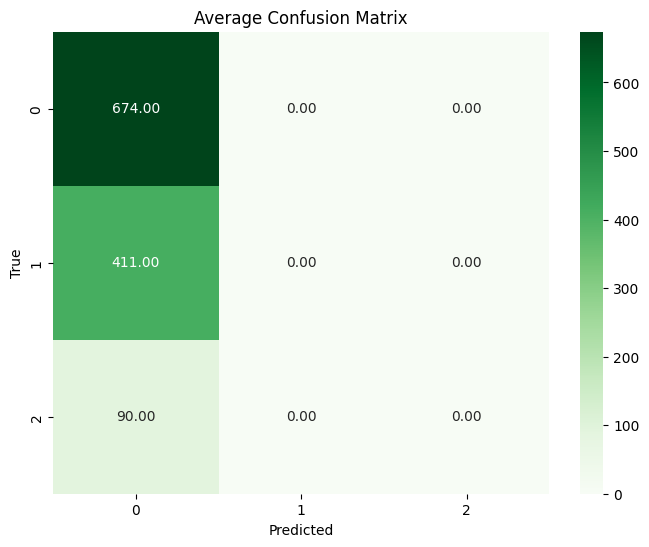

In [ ]:
average_cm /= 10
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

##navie bayes

In [ ]:


# Khởi tạo danh sách để lưu kết quả
nv = []

# Khởi tạo ma trận confusion matrix trung bình
average_cm = np.zeros((3, 3))


for i in range(10):

    # Khởi tạo mô hình Naive Bayes
    model = GaussianNB()

    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá độ chính xác của mô hình và lưu kết quả vào danh sách
    accuracy = accuracy_score(y_test, y_pred)
    nv.append(accuracy)

    # Tính confusion matrix cho lần chạy hiện tại
    cm = confusion_matrix(y_test, y_pred)
    average_cm += cm
print(sum(nv)/10)




0.5651063829787234


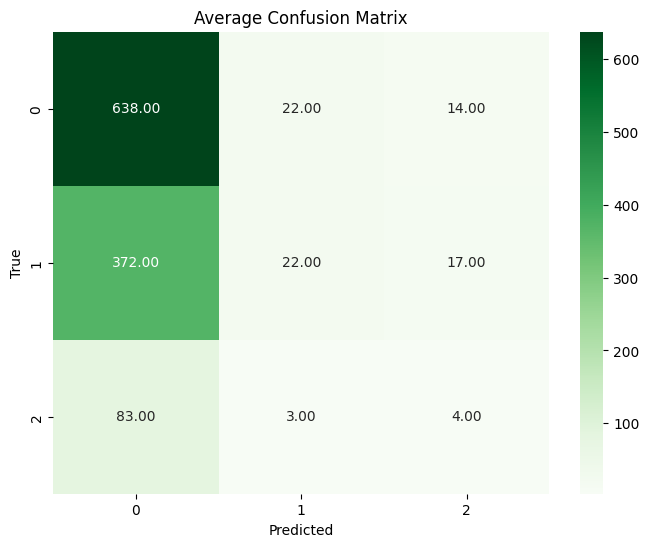

In [ ]:
average_cm /= 10
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()

In [ ]:
result = []
name = ['decision tree', 'random forest', 'SVM', 'navie bayes']

In [ ]:
for i in range(10):
  a=[]
  a.append(dt[i])
  a.append(rf[i])
  a.append(svm[i])
  a.append(nv[i])

  result.append(a)

In [ ]:
print(result[0])

[0.5174468085106383, 0.5514893617021277, 0.5736170212765958, 0.5651063829787234]


In [ ]:
# Làm tròn tới 3 chữ số cho tất cả các phần tử của mảng
result_new = np.round(result, decimals=3)

# In ra mảng đã làm tròn
print(result_new[0])

[0.517 0.551 0.574 0.565]


In [ ]:

np.savetxt("result.csv", result_new, delimiter=',', fmt='%.3f')